In [1]:
#Loading the Dataset
import pandas as pd

df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
#Checking for Error value or missing value
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Checking for duplicate values
df.duplicated().sum()

0

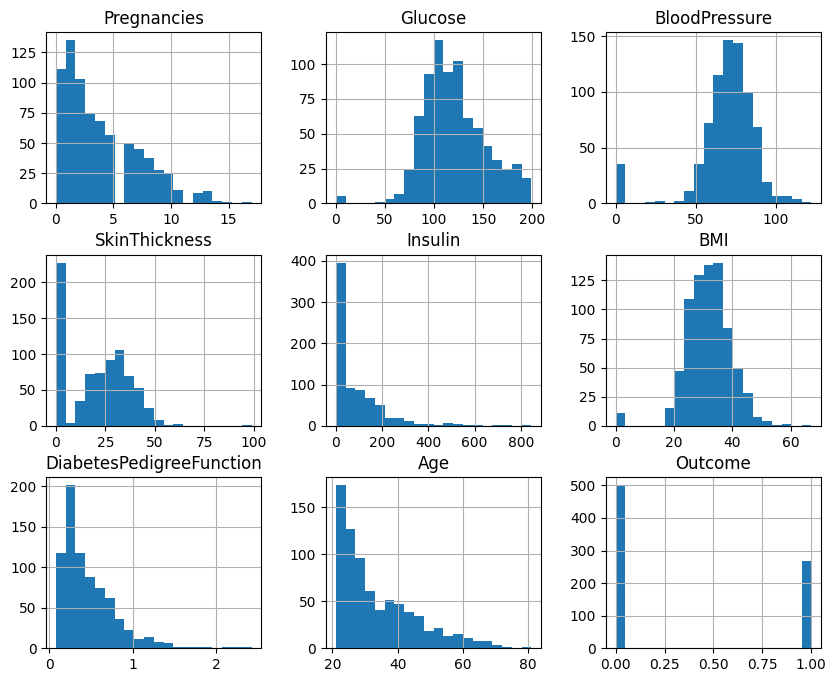

In [5]:
#Histogram before cleaning the data
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8), bins=20)
plt.show()

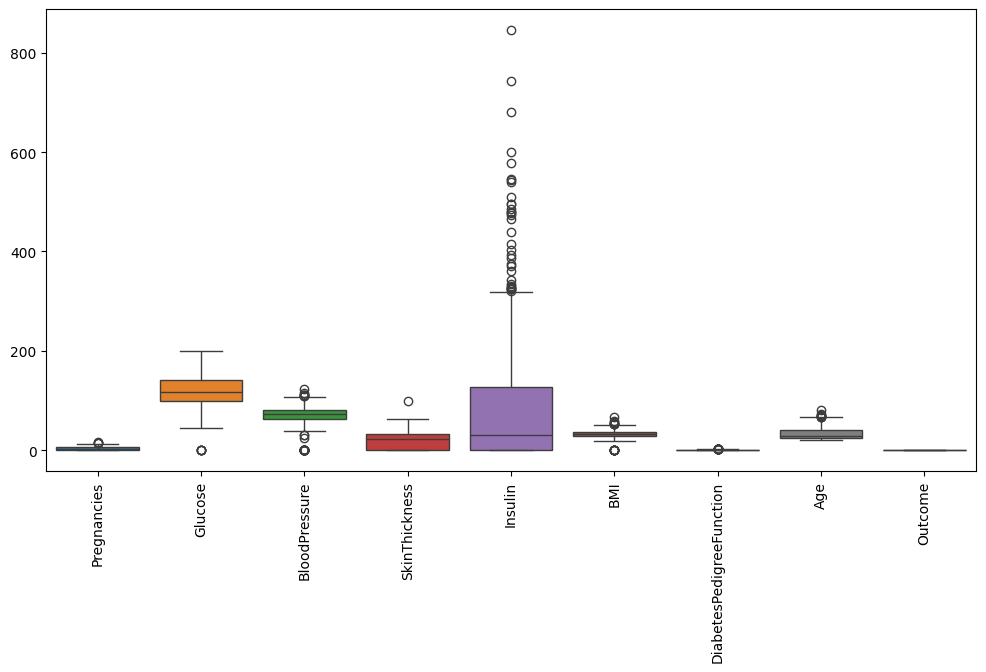

In [6]:
# Outliers before cleaning the data

import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [7]:
import numpy as np

# Creating function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR  # Lower boundary
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary

    # Filtering the dataframe
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Applying function to remove outliers from specific columns
columns_with_outliers = ["Insulin", "SkinThickness", "BloodPressure", "Glucose"]

for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Verifying the new dataset shape
df.shape

(675, 9)

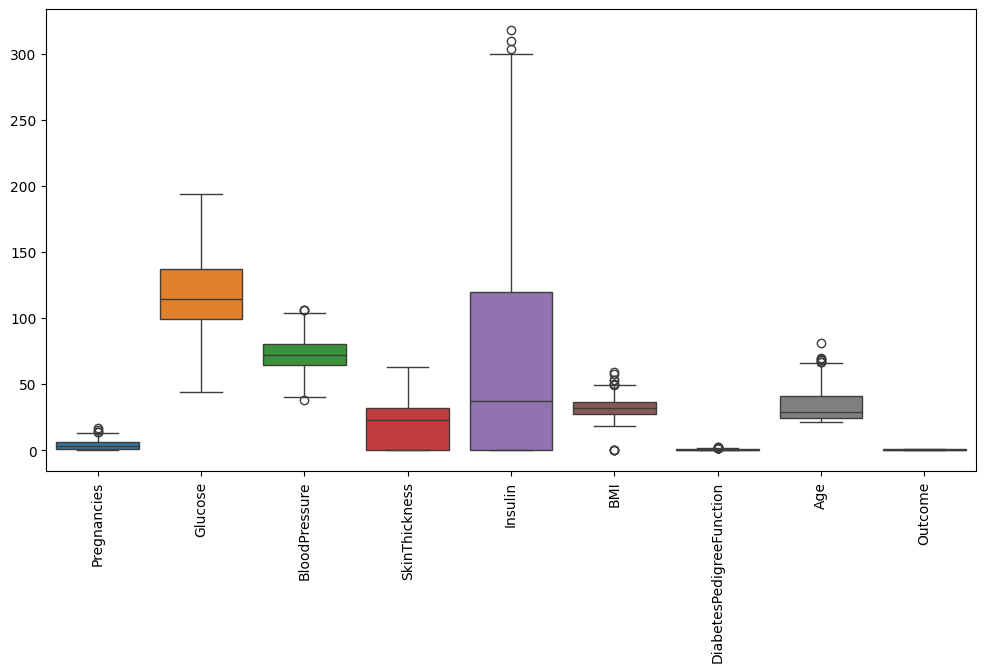

In [8]:
# Again checking the outliers

import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Loading the cleaned dataset

import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,119.958065,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,119.958065,26.6,0.351,31,0
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,5,116.0,74.0,28.446262,119.958065,25.6,0.201,30,0
4,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1


In [10]:
import numpy as np

# Further removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR  # Lower boundary
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary

    # Filtering the dataframe
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Applying function to remove outliers again from specific columns
columns_with_outliers = ["Insulin", "SkinThickness", "BloodPressure", "Glucose"]

for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Check the new dataset shape
df.shape

(589, 9)

In [11]:
# Checking the values

df.shape

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               589 non-null    int64  
 1   Glucose                   589 non-null    float64
 2   BloodPressure             589 non-null    float64
 3   SkinThickness             589 non-null    float64
 4   Insulin                   589 non-null    float64
 5   BMI                       589 non-null    float64
 6   DiabetesPedigreeFunction  589 non-null    float64
 7   Age                       589 non-null    int64  
 8   Outcome                   589 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 41.5 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,3.713073,115.698642,71.628183,28.301949,115.816148,31.849915,0.427513,31.682513,0.286927
std,3.239454,25.775415,10.966986,7.876638,19.385749,6.324312,0.247057,10.006429,0.452712
min,0.000000,56.000000,44.000000,12.000000,82.562903,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,24.000000,105.000000,27.300000,0.238000,24.000000,0.000000
50%,3.000000,112.000000,72.000000,28.446262,119.958065,32.000000,0.361000,28.000000,0.000000
75%,6.000000,130.000000,80.000000,32.000000,119.958065,35.900000,0.586000,38.000000,1.000000
max,13.000000,179.500000,104.000000,44.000000,142.395161,48.300000,1.108000,59.000000,1.000000


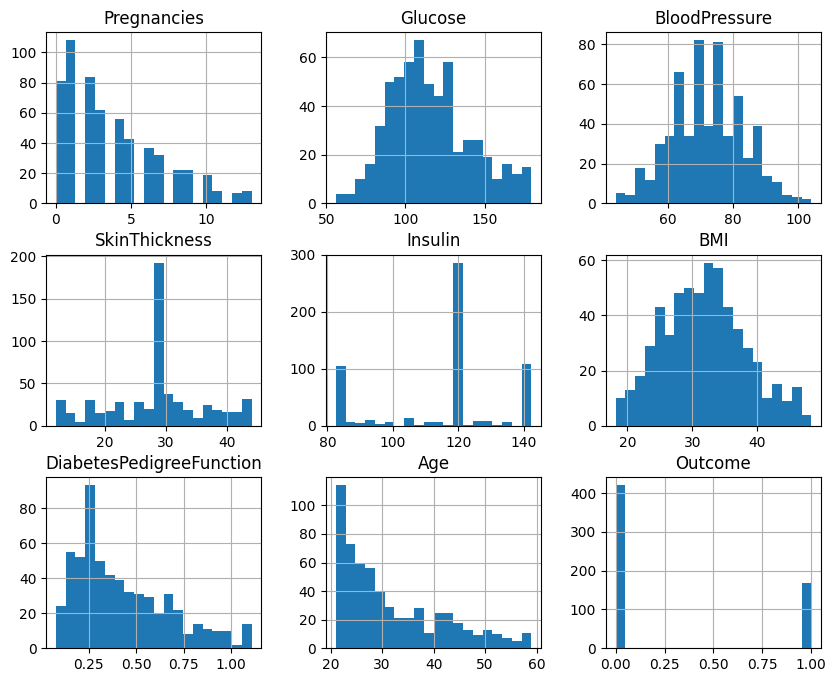

In [12]:
# Histogram After cleaning the dataset

import matplotlib.pyplot as plt
df.hist(figsize=(10, 8), bins=20)
plt.show()

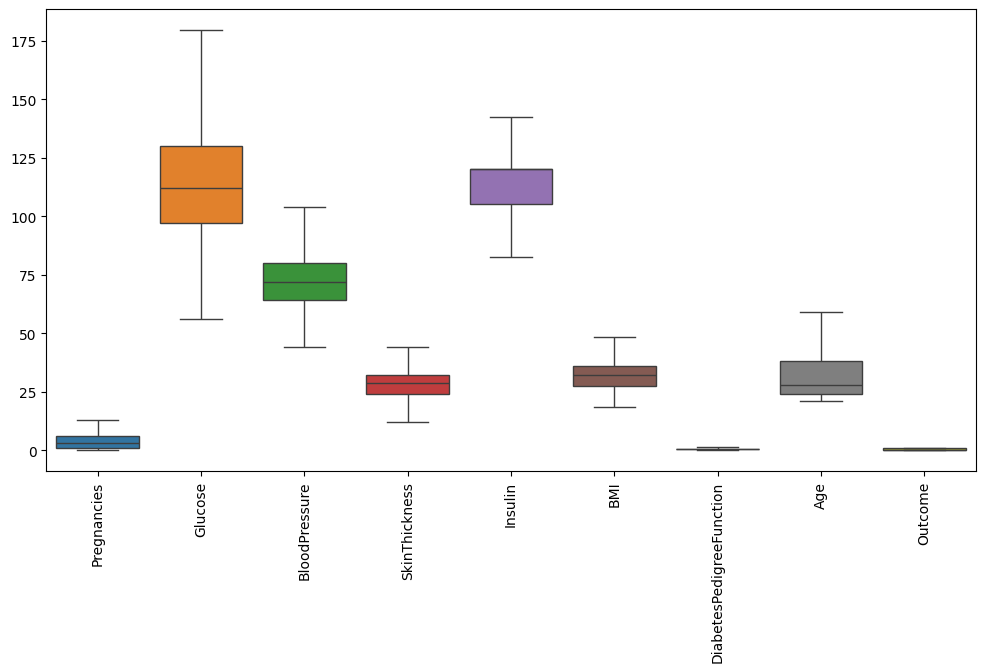

In [13]:
# Outliers BoxPlot after cleaning the dataset

import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(columns=['Outcome'])  # Features (all columns except Outcome)
y = df['Outcome']  # Target variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Splitting the dataset into 80% training and 20% testing

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((471, 8), (118, 8), (471,), (118,))

In [18]:
from sklearn.preprocessing import StandardScaler

In [55]:
# Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [58]:
import pandas as pd

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,471.00,471.00,471.00,471.00,471.00,471.00,471.00,471.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.19,-2.27,-2.50,-2.05,-1.66,-2.15,-1.45,-1.06
25%,-0.88,-0.71,-0.68,-0.54,-0.52,-0.73,-0.76,-0.77
50%,-0.26,-0.18,0.05,0.01,0.25,-0.00,-0.27,-0.38
75%,0.68,0.63,0.77,0.46,0.25,0.63,0.64,0.70
max,2.85,2.42,2.96,1.96,1.39,2.57,2.77,2.66


In [59]:
# Training Logistic Regression model with the scaled dataset

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        95
           1       0.43      0.52      0.47        23

    accuracy                           0.77       118
   macro avg       0.65      0.68      0.66       118
weighted avg       0.79      0.77      0.78       118



In [25]:
# Columns where 0 is invalid
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with the mean of non-zero values in each column
for col in cols_to_replace:
    mean_value = df[col][df[col] != 0].mean()  # Compute mean excluding 0s
    df.loc[df[col] == 0, col] = mean_value  # Replace 0s with the calculated mean

# Verify that zeros are removed
print(df[cols_to_replace].min())  # Should not contain 0s
print((df[cols_to_replace] == 0).sum())  # Should print all zeros

Glucose          56.000000
BloodPressure    44.000000
SkinThickness    12.000000
Insulin          82.562903
BMI              18.200000
dtype: float64
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [26]:
# Convert columns to float to avoid dtype issues
df[cols_to_replace] = df[cols_to_replace].astype(float)

# Replace 0s with the mean of non-zero values in each column
for col in cols_to_replace:
    mean_value = df[col].replace(0, np.nan).mean()  # Compute mean, treating 0s as NaN
    df[col] = df[col].replace(0, mean_value)  # Replace 0s with the calculated mean

# Verify that zeros are removed
print(df[cols_to_replace].min())  # Should not contain 0s
print((df[cols_to_replace] == 0).sum())  # Should print all zeros


Glucose          56.000000
BloodPressure    44.000000
SkinThickness    12.000000
Insulin          82.562903
BMI              18.200000
dtype: float64
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [27]:
print(df[cols_to_replace].head())

   Glucose  BloodPressure  SkinThickness     Insulin   BMI
0    148.0           72.0      35.000000  119.958065  33.6
1     85.0           66.0      29.000000  119.958065  26.6
2     89.0           66.0      23.000000   94.000000  28.1
3    116.0           74.0      28.446262  119.958065  25.6
4     78.0           50.0      32.000000   88.000000  31.0


In [28]:
df.to_csv("cleaned_dataset.csv", index=False)

In [29]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,119.958065,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,119.958065,26.6,0.351,31,0
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,5,116.0,74.0,28.446262,119.958065,25.6,0.201,30,0
4,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1


In [30]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,3.713073,115.698642,71.628183,28.301949,115.816148,31.849915,0.427513,31.682513,0.286927
std,3.239454,25.775415,10.966986,7.876638,19.385749,6.324312,0.247057,10.006429,0.452712
min,0.000000,56.000000,44.000000,12.000000,82.562903,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,24.000000,105.000000,27.300000,0.238000,24.000000,0.000000
50%,3.000000,112.000000,72.000000,28.446262,119.958065,32.000000,0.361000,28.000000,0.000000
75%,6.000000,130.000000,80.000000,32.000000,119.958065,35.900000,0.586000,38.000000,1.000000
max,13.000000,179.500000,104.000000,44.000000,142.395161,48.300000,1.108000,59.000000,1.000000


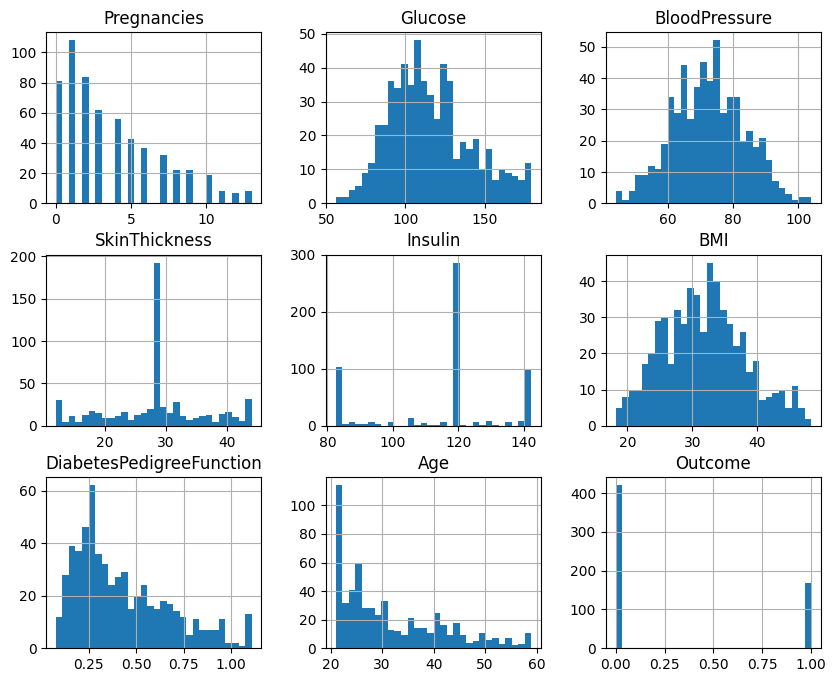

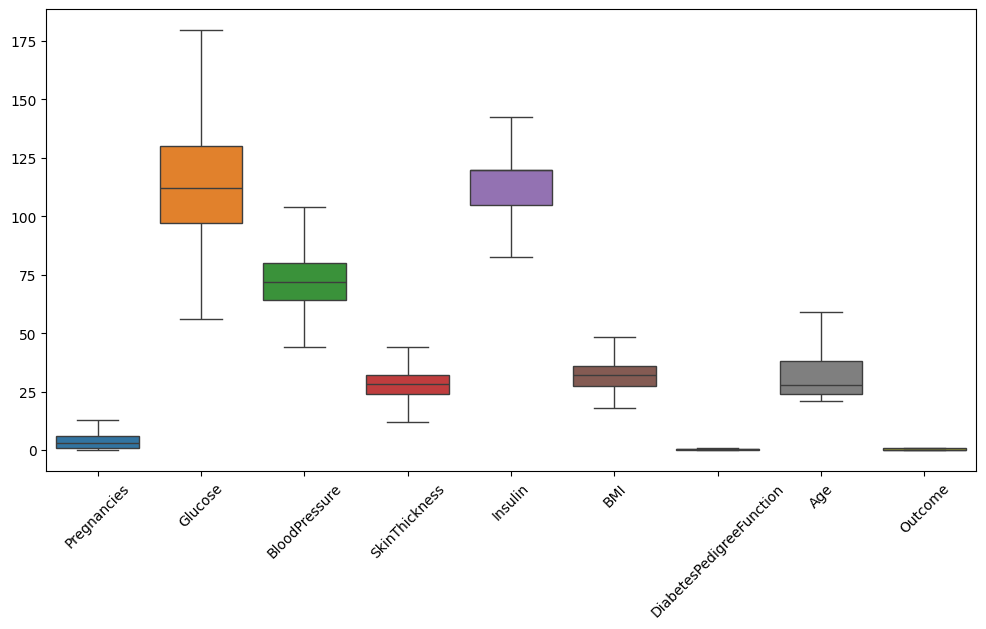

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 8), bins=30)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

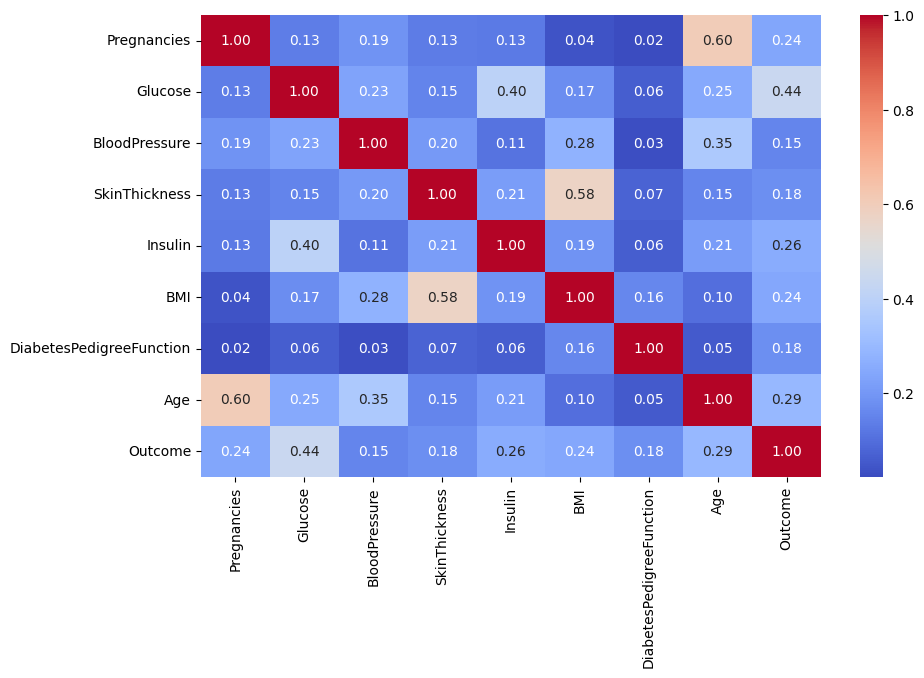

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [34]:
import numpy as np

# Calculate Q1, Q3, and IQR for Insulin
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Apply capping
df["Insulin"] = np.clip(df["Insulin"], lower_bound, upper_bound)

# Verify the changes with min/max values
print("New Min:", df["Insulin"].min())
print("New Max:", df["Insulin"].max())

New Min: 82.56290322580644
New Max: 142.39516129032262


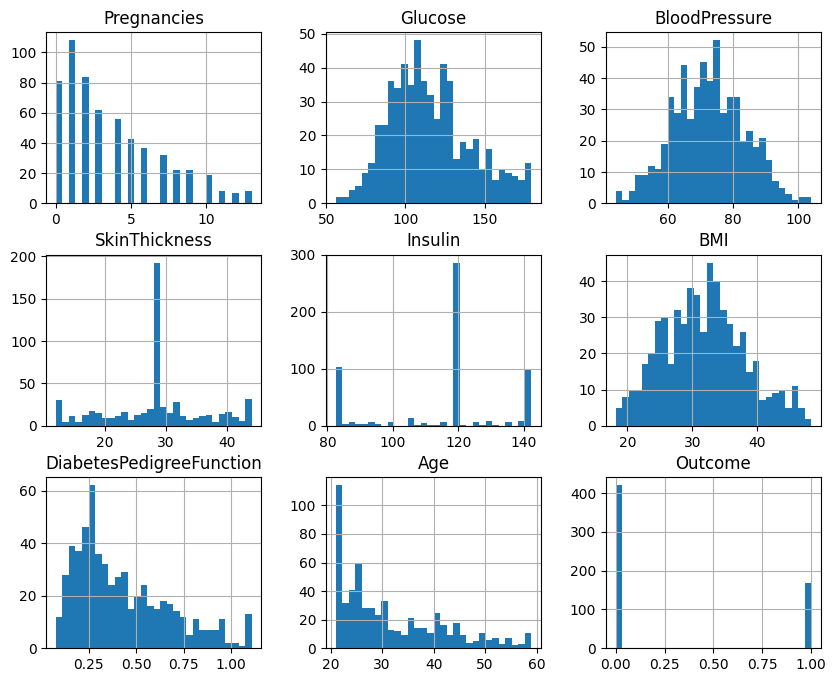

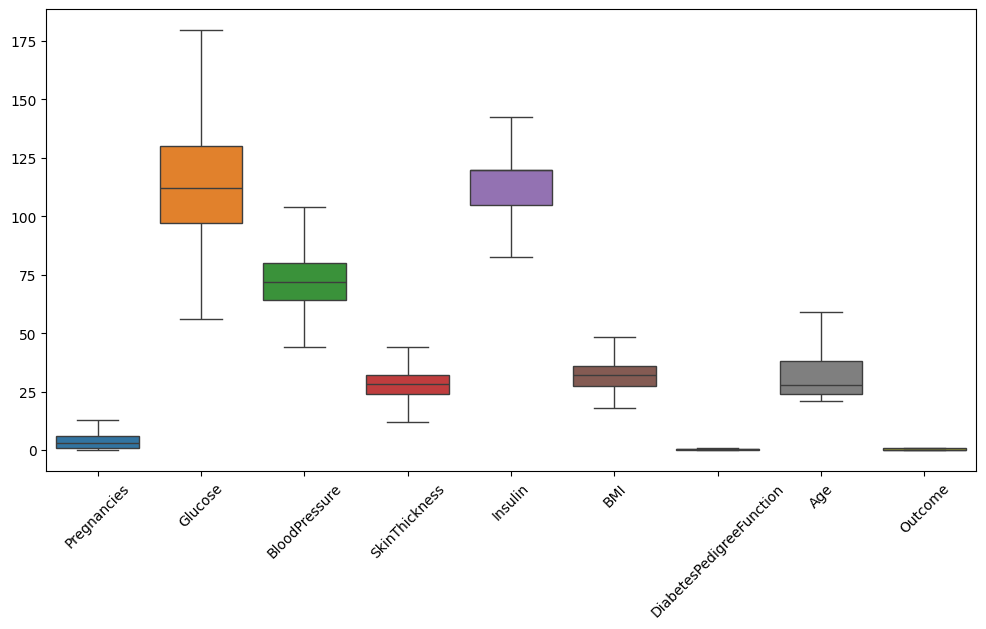

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 8), bins=30)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [36]:
df.to_csv("cleaned_dataset.csv", index=False)

In [37]:
Q1 = df["SkinThickness"].quantile(0.25)
Q3 = df["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["SkinThickness"] = np.clip(df["SkinThickness"], lower_bound, upper_bound)

In [38]:
Q1 = df["Glucose"].quantile(0.25)
Q3 = df["Glucose"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Glucose"] = np.clip(df["Glucose"], lower_bound, upper_bound)

In [39]:
# Capping outliers for Age
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Age"] = np.clip(df["Age"], lower_bound, upper_bound)

# Capping outliers for DiabetesPedigreeFunction
Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["DiabetesPedigreeFunction"] = np.clip(df["DiabetesPedigreeFunction"], lower_bound, upper_bound)

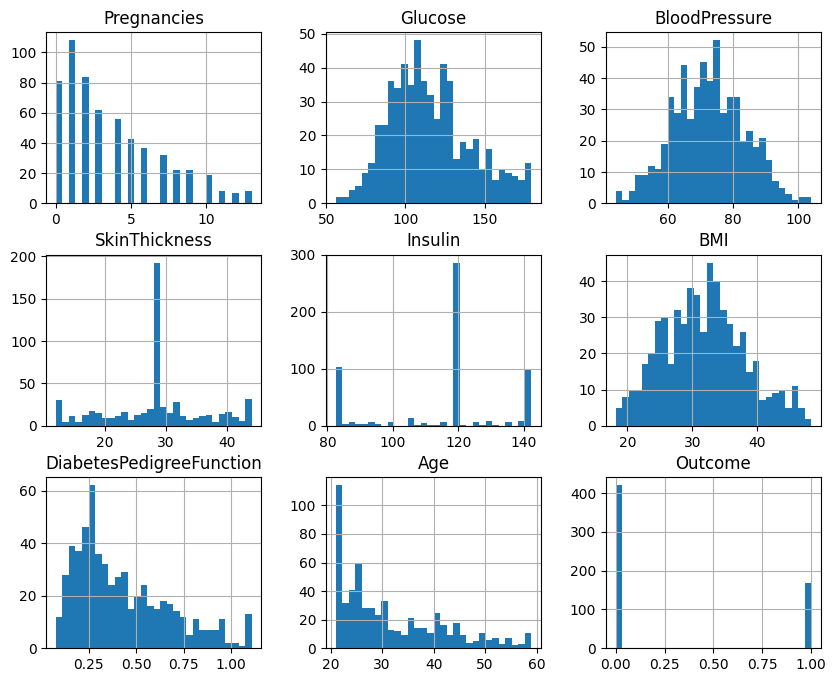

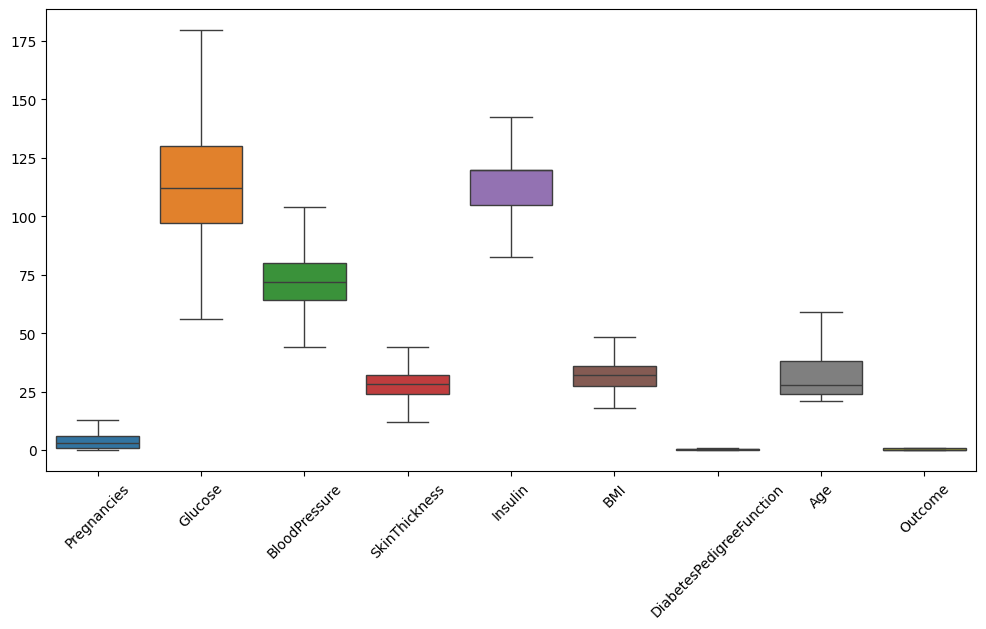

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 8), bins=30)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [41]:
df.to_csv("cleaned_dataset.csv", index=False)

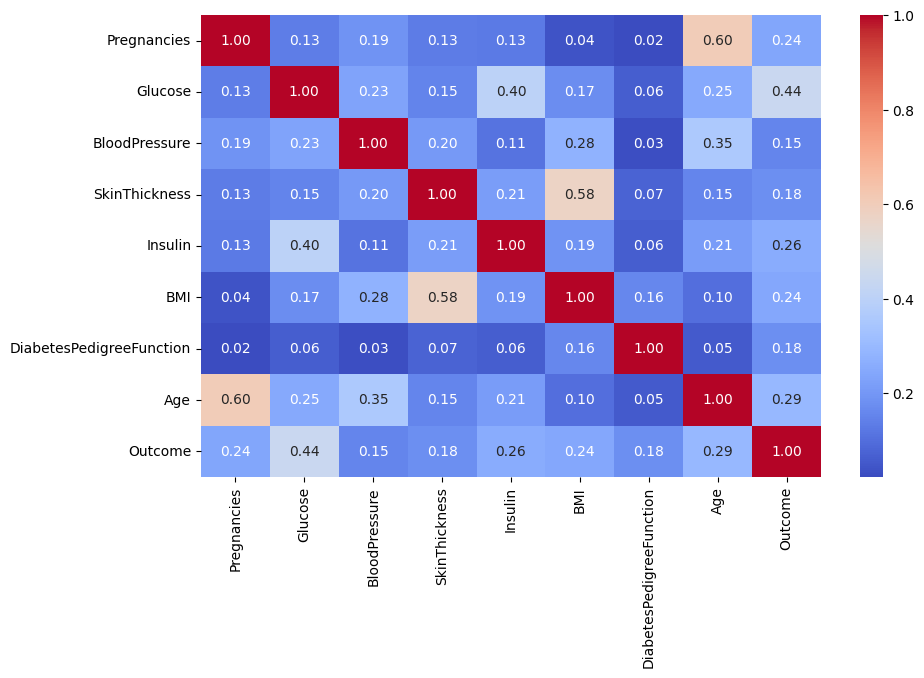

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
import joblib  # Import joblib to save the scaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select only feature columns (exclude target variable)
X = df.drop(columns=["Outcome"])  # Assuming 'Outcome' is the target column
y = df["Outcome"]

# Fit and transform training data
X_scaled = scaler.fit_transform(X)

# Save the scaler to use in Streamlit
joblib.dump(scaler, "scaler.pkl")

print("Scaler saved successfully!")

Scaler saved successfully!


In [44]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [45]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.706561,1.254250,0.033932,0.851092,0.213839,0.276959,0.808141,1.832128
1,-0.838221,-1.192017,-0.513629,0.088698,0.213839,-0.830822,-0.309960,-0.068265
2,-0.838221,-1.036699,-0.513629,-0.673696,-1.126327,-0.593440,-1.055361,-1.068472
3,0.397604,0.011702,0.216453,0.018337,0.213839,-0.989076,-0.917624,-0.168286
4,-0.220308,-1.463825,-1.973794,0.469895,-1.436096,-0.134503,-0.727222,-0.568369


In [66]:
from sklearn.model_selection import train_test_split

# Spliting into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shape of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (471, 8)
Testing data shape: (118, 8)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

Logistic Regression Accuracy: 0.7966101694915254


In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf.predict(X_test)

# Evaluating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7711864406779662


In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.7966101694915254


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Defining hyperparameters to test
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Using GridSearchCV to find the best k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_["n_neighbors"]
print("Best K value:", best_k)

# Training KNN with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best_knn = best_knn.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred_best_knn)
precision = precision_score(y_test, y_pred_best_knn)
recall = recall_score(y_test, y_pred_best_knn)
f1 = f1_score(y_test, y_pred_best_knn)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_knn)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_knn))


Best K value: 11

Evaluation Metrics:
Accuracy: 0.7966
Precision: 0.7273
Recall: 0.4706
F1-Score: 0.5714

Confusion Matrix:
[[78  6]
 [18 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        84
           1       0.73      0.47      0.57        34

    accuracy                           0.80       118
   macro avg       0.77      0.70      0.72       118
weighted avg       0.79      0.80      0.78       118



In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Defining parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid searching to find the best C value
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best C value
best_C = grid_search.best_params_["C"]
print("Best C value:", best_C)

# Training Logistic Regression with best C
best_log_reg = LogisticRegression(C=best_C)
best_log_reg.fit(X_train, y_train)
y_pred_best_log = best_log_reg.predict(X_test)

# Evaluating performance
accuracy = accuracy_score(y_test, y_pred_best_log)
precision = precision_score(y_test, y_pred_best_log)
recall = recall_score(y_test, y_pred_best_log)
f1 = f1_score(y_test, y_pred_best_log)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_log)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_log))


Best C value: 1

Evaluation Metrics:
Accuracy: 0.7966
Precision: 0.7500
Recall: 0.4412
F1-Score: 0.5556

Confusion Matrix:
[[79  5]
 [19 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        84
           1       0.75      0.44      0.56        34

    accuracy                           0.80       118
   macro avg       0.78      0.69      0.71       118
weighted avg       0.79      0.80      0.78       118



In [62]:
import joblib

# Saving the best model
joblib.dump(best_log_reg, "final_model.pkl")

print("Model saved successfully!")

Model saved successfully!


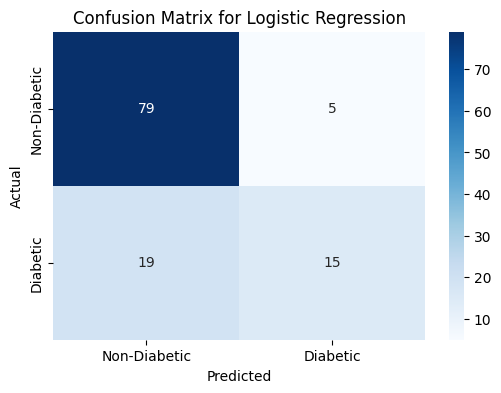

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Ploting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

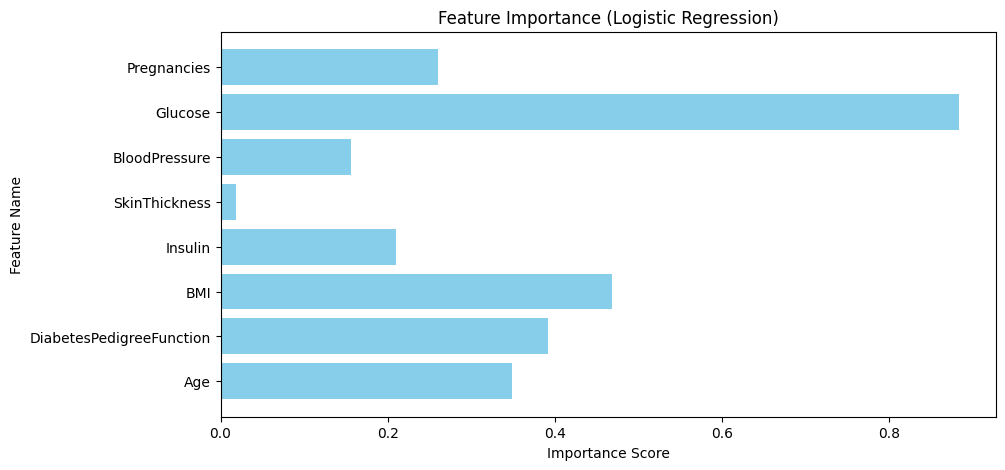

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Getting feature importance from Logistic Regression model
feature_importance = np.abs(best_log_reg.coef_).flatten()
feature_names = X_train.columns

# Ploting feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importance, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance (Logistic Regression)")
plt.gca().invert_yaxis()  # Invert axis for better visualization
plt.show()